## Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bikes(day) dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation and Visualising

- You can see that your dataset has many columns with values as 1 or 0 which can be categorical columns.As categorical values should not in numeric. So we need to convert them in Categories .

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [6]:
# We can see that instant is not required as it contains Serial Numbers.
bikes.drop(['instant'], axis = 1, inplace = True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# We rename some column names to make them more redable and understandable
bikes.rename(columns = {'dteday':'date','yr':'year','mnth':'month','hum':'humidity'}, inplace = True)
bikes.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Variables to map

# Applying the map function to the Bikes dataset
bikes['season'] = bikes.season.map({1: 'spring', 2: 'summer',3:'fall',4:'winter'})

bikes['weathersit'] = bikes.weathersit.map({1: 'Clear', 2: 'Mist',3:'Light Snow',4:'Heavy Rain'})

bikes['month'] = bikes.month.map({1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr',5: 'May', 6: 'Jun',7: 'July', 8: 'Aug',9: 'Sept', 10: 'Oct',11: 'Nov', 12: 'Dec'})

bikes['weekday'] = bikes.weekday.map({0: 'Sunday', 1: 'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

bikes.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


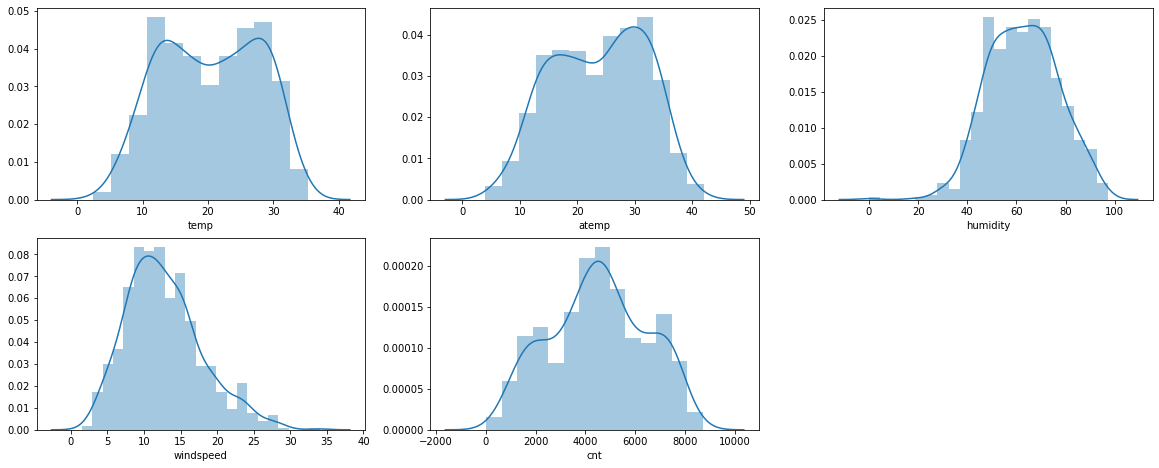

In [9]:
# Visualize the distplot of various numerical variables to check their distribution.
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.distplot(bikes['temp'])

plt.subplot(3,3,2)
sns.distplot(bikes['atemp'])

plt.subplot(3,3,3)
sns.distplot(bikes['humidity'])

plt.subplot(3,3,4)
sns.distplot(bikes['windspeed'])

plt.subplot(3,3,5)
sns.distplot(bikes['cnt'])

plt.show()

In [10]:
bikes['date'] = bikes['date'].astype('datetime64')
bikes.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes_categorical = bikes.select_dtypes(exclude=['integer','float','datetime64'])

In [12]:
bikes_categorical.columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [13]:
len(bikes_categorical.columns)

4

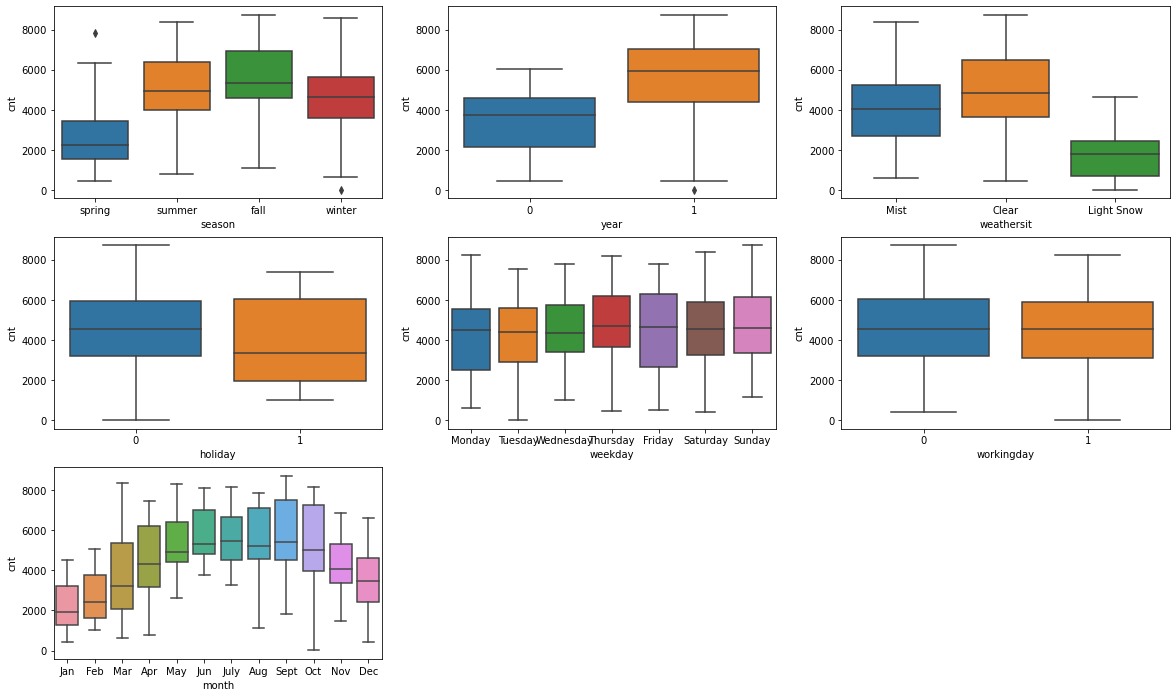

In [14]:
# visualize various categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)

plt.subplot(3,3,2)
sns.boxplot(x='year',y='cnt',data=bikes)

plt.subplot(3,3,3)
sns.boxplot(x='weathersit',y='cnt',data=bikes)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikes)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikes)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikes)

plt.subplot(3,3,7)
sns.boxplot(x='month',y='cnt',data=bikes)

plt.show()

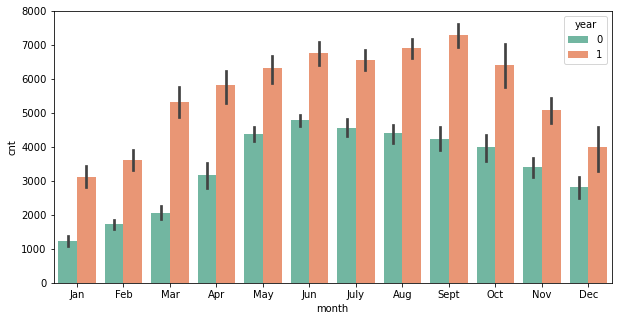

In [15]:
#Relation between Month and Year Variables 
plt.figure(figsize=(10,5))
sns.barplot('month','cnt',hue='year',data=bikes,palette='Set2')
plt.show()

In [16]:
#Convert Numerical Columns to float
float_var = ['temp','atemp','humidity','windspeed','casual','registered','cnt']

for var in float_var:
    bikes[var] = bikes[var].astype(float)

bikes.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [17]:
bikes_numeric = bikes.select_dtypes(include=['float'])
bikes_numeric.head()

,temp,atemp,humidity,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [18]:
bikes_numeric.shape

(730, 7)

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

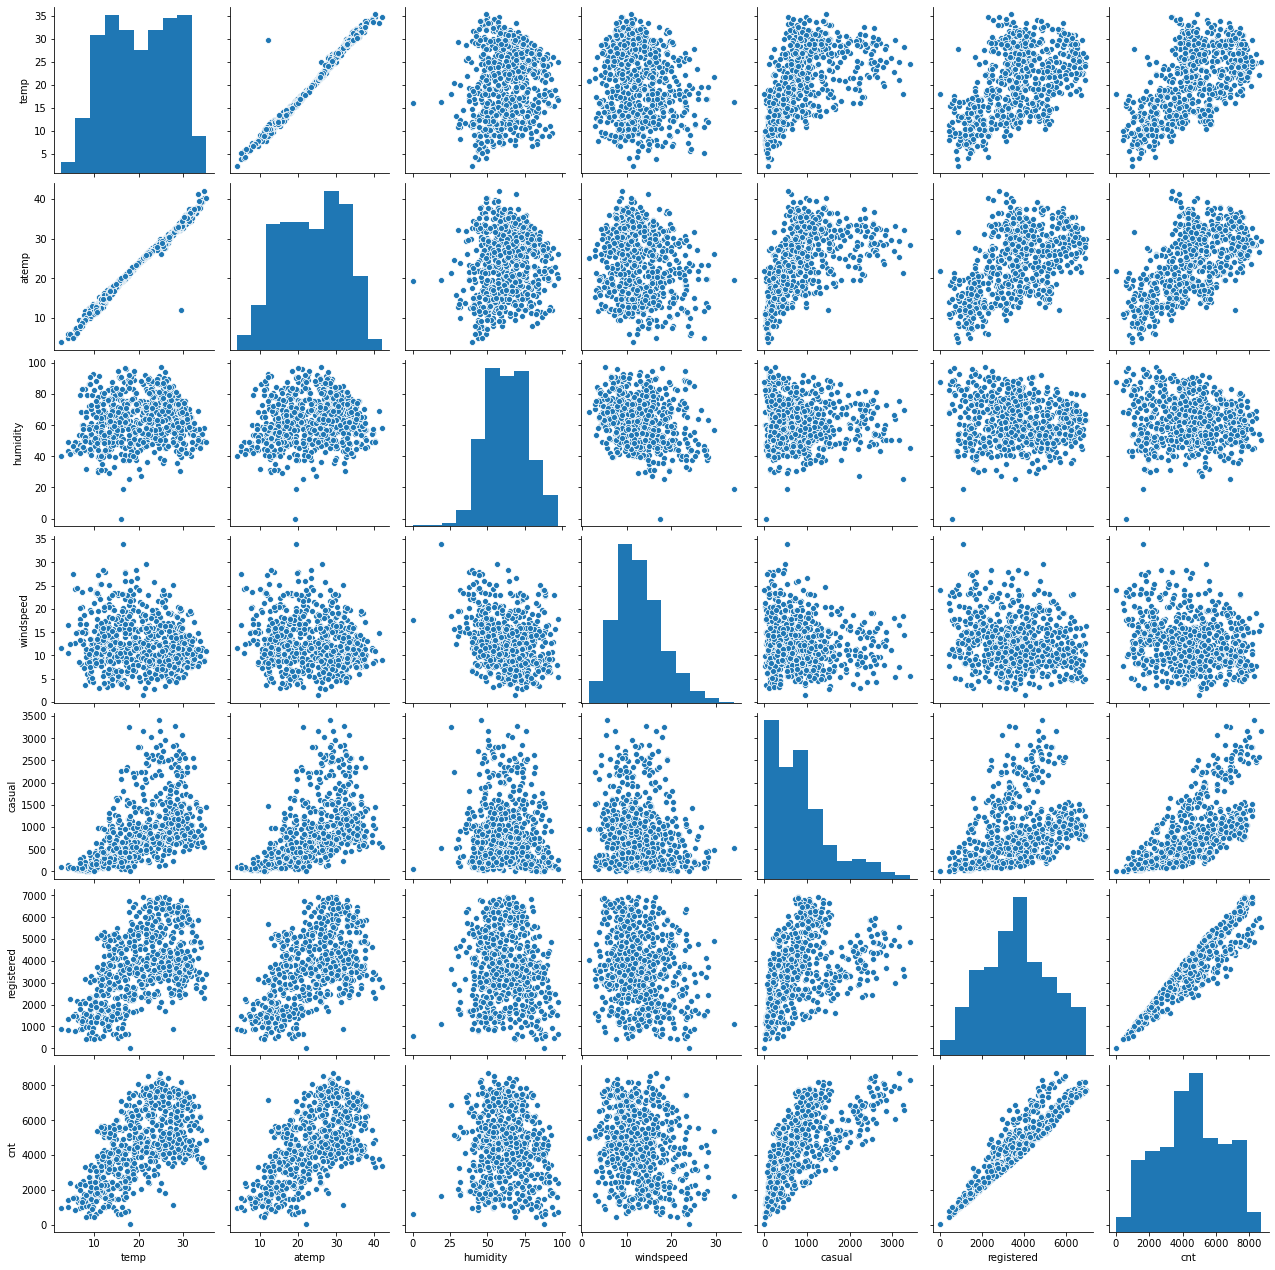

In [19]:
# Visualize Num Column 

sns.pairplot(bikes_numeric)
plt.show()

In [20]:
corr = bikes_numeric.corr()
corr

,temp,atemp,humidity,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


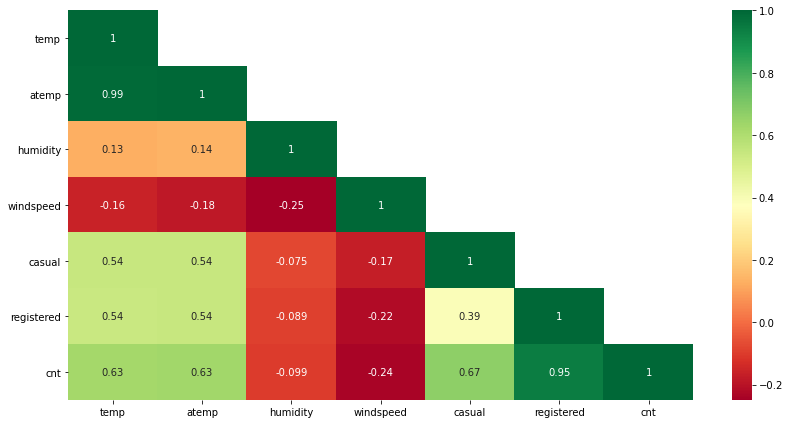

In [21]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(12,6))
sns.heatmap(corr,mask=mask,annot=True,cmap="RdYlGn");
plt.tight_layout()

In [22]:
bikes.drop(['atemp','casual','registered'], axis = 1, inplace = True)
bikes.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985.0
1,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801.0
2,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600.0


In [23]:
# We can see that date is not required date(dtday) column contains date of sale . For that we have Months and Year Column already.
bikes.drop(['date'], axis = 1, inplace = True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600.0


### Dummy Variables

In [24]:
# Check categorical columns for which dummy variables are made
bikes_categorical = bikes.select_dtypes(include=['object'])
bikes_categorical.columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [25]:
# Make dummy variables of Categorical Columns
months=pd.get_dummies(bikes.month,drop_first=True)
weekdays=pd.get_dummies(bikes.weekday,drop_first=True)
weather_sit=pd.get_dummies(bikes.weathersit,drop_first=True)
seasons=pd.get_dummies(bikes.season,drop_first=True)

In [26]:
# Add the results to the original bike dataframe
bikes=pd.concat([bikes,months,weekdays,weather_sit,seasons],axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bikes.drop(bikes_categorical, axis = 1, inplace = True)
bikes.head() 

,year,holiday,workingday,temp,humidity,windspeed,cnt,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
bikes.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [30]:
#Rows and columns of Train and test data after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [31]:
# Check columns in Train Dataset
bike_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [32]:
# Scaling of the numerical features using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','cnt']

#Fit and transform on Train data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [34]:
bike_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


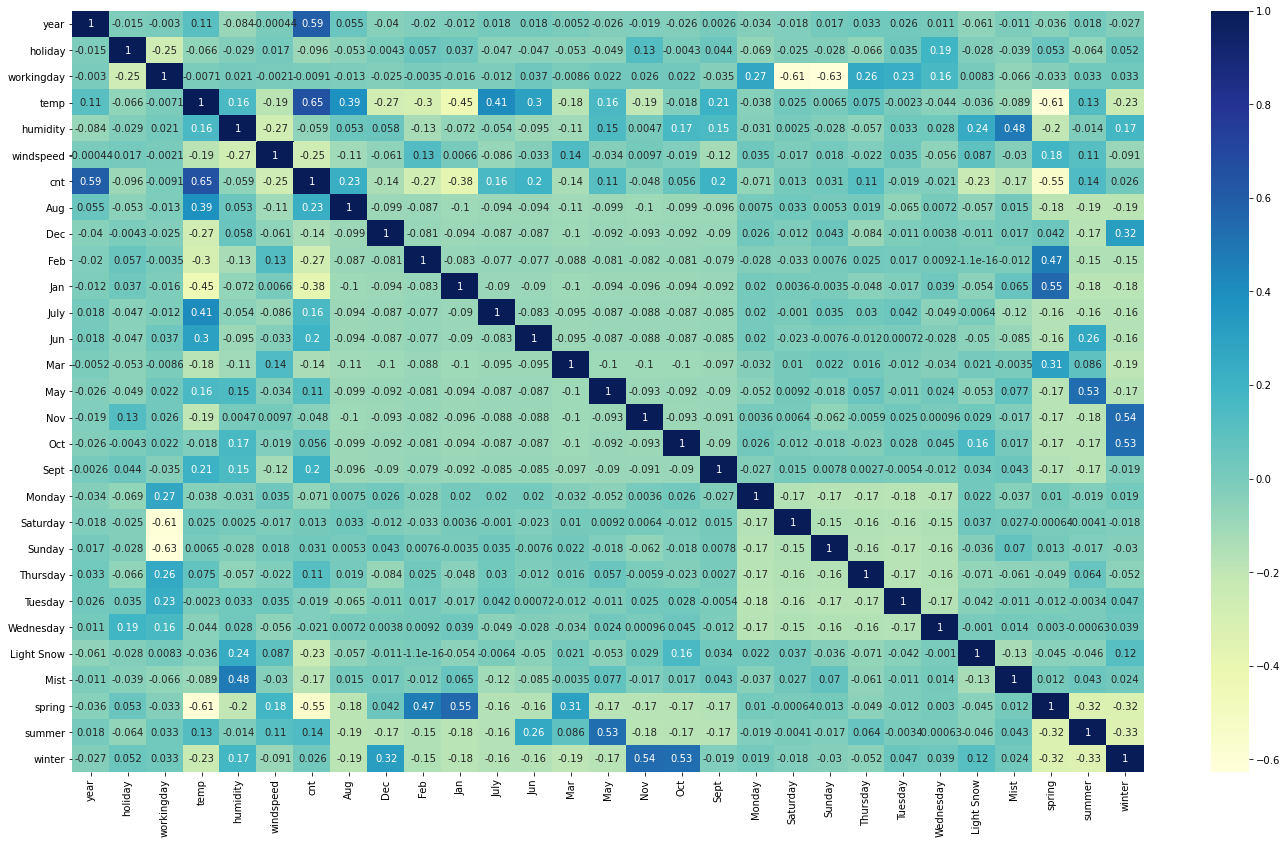

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 14))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y train sets for the model building

In [36]:
#Divide the data into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [39]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [40]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jan',
       'July', 'Nov', 'Sept', 'Light Snow', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

In [41]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.15e-189
Time:                        23:38:39   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [45]:
#Drop the constant term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [46]:
# Calculate the VIFs for the latest model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Mist,2.32
0,year,2.09
8,Nov,1.85
6,Jan,1.75


In [47]:
#Drop Dec as it has considerable high p-value
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

In [48]:
#Build model Again 
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.41e-189
Time:                        23:38:39   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.035      8.598      0.0

In [49]:
#Drop the constant term
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.09
2,temp,16.80
4,windspeed,4.72
11,spring,4.37
13,winter,3.78
12,summer,2.80
10,Mist,2.29
0,year,2.09
5,Jan,1.67
7,Nov,1.60


In [51]:
#Drop Janas it contains high p-value
X_train_new2 = X_train_lm1.drop(["Jan"], axis = 1)

In [52]:
#Build new model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.94e-189
Time:                        23:38:39   Log-Likelihood:                 510.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2910      0.035      8.364      0.0

In [53]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [54]:
# Calculate the VIFs for the latest model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,28.10
2,temp,16.12
4,windspeed,4.71
10,spring,4.04
12,winter,3.75
11,summer,2.80
9,Mist,2.29
0,year,2.08
6,Nov,1.60
5,July,1.58


In [55]:
#Drop the Nov column as it has high p-value
X_train_new3=X_train_lm2.drop(['Nov'],axis=1)

In [56]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.95e-190
Time:                        23:38:40   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.0

In [57]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [58]:
# Calculate the VIFs of model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,28.03
2,temp,16.03
4,windspeed,4.65
9,spring,4.01
11,winter,3.33
10,summer,2.79
8,Mist,2.28
0,year,2.08
5,July,1.58
6,Sept,1.38


In [59]:
#Drop Humidityas it has high VIF
X_train_new4= X_train_lm3.drop(['humidity'], axis=1)

In [60]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.06e-187
Time:                        23:38:40   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [61]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,July,1.58
7,Mist,1.55
5,Sept,1.34
6,Light Snow,1.08


In [63]:
#Drop Windspeed as it has considerable high VIF
X_train_new5=X_train_lm4.drop(['windspeed'], axis=1)

In [64]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.71e-181
Time:                        23:38:40   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.0

In [65]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [66]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,year,2.06
8,summer,1.94
3,July,1.58
9,winter,1.57
6,Mist,1.55
7,spring,1.40
4,Sept,1.34
5,Light Snow,1.07
1,holiday,1.04


## Residual

In [67]:
X_train_lm5

,const,year,holiday,temp,July,Sept,Light Snow,Mist,spring,summer,winter
576,1.0,1,0,0.815169,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0,0,0,1,0,1,0
580,1.0,1,0,0.914852,0,0,0,0,0,0,0
500,1.0,1,0,0.719639,0,0,0,0,0,1,0
479,1.0,1,0,0.520271,0,0,0,0,0,1,0
472,1.0,1,0,0.503656,0,0,0,1,0,1,0
455,1.0,1,0,0.456929,0,0,0,1,0,1,0


In [68]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

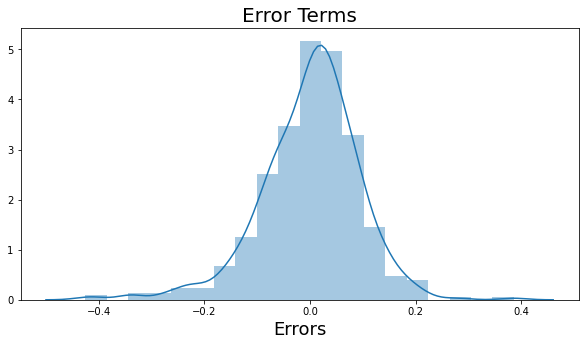

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [70]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','cnt']

#Transform the Test data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [71]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Columns of final model of train dataset 
X_train_new5.columns

Index(['year', 'holiday', 'temp', 'July', 'Sept', 'Light Snow', 'Mist',
       'spring', 'summer', 'winter'],
      dtype='object')

In [73]:
# Now let's use final model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,year,holiday,temp,July,Sept,Light Snow,Mist,spring,summer,winter
184,1.0,0,1,0.831783,1,0,0,1,0,0,0
535,1.0,1,0,0.901354,0,0,0,0,0,1,0
299,1.0,0,0,0.511964,0,0,0,1,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,0,0,0,0,1,0


In [74]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [75]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.8092660294132242

In [76]:
#Adjusted R^2

#Formula of Adjusted R-Square
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
#n =sample size , p = number of independent variables

Adj_r2=1-(1-r2)*(11-1)/(11-1-1)
print(Adj_r2)

0.7880733660146936


In [77]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07243163364424345
Mean Squared Error: 0.009119807381204633
Root Mean Squared Error: 0.09549768259599095


## Model Evaluation

<Figure size 432x288 with 0 Axes>

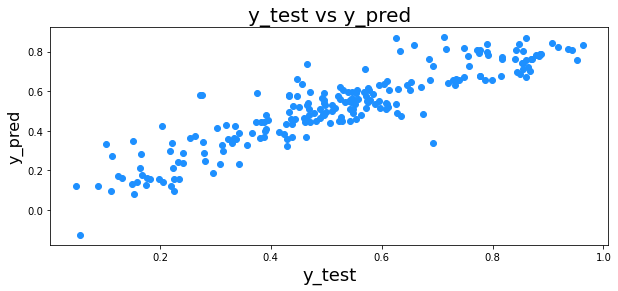

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,4))
plt.scatter(y_test,y_pred,color='dodgerblue')

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

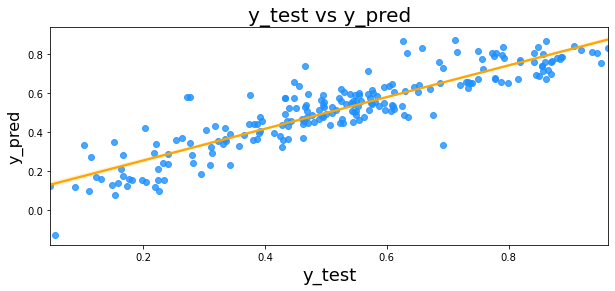

In [79]:
#Regression plot
plt.figure(figsize=(10,4))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### We can see that the equation of our best fitted line is:

count = 0.5029*temp+0.0812*September+0.0367*summer+0.0829*winter+0.2326*year-0.1003*holiday-0.0523*July−0.2989*lightsnow−0.0785*mist−0.0766*spring

#### Result Comparison between Train model and Test model :

- Train
    - R-Square  82.4
    - Adj. R-Square 82.0
- Test
    - R-Square  80.92
    - Adj. R- Square  78.80
    
###### Difference in R^2 between train model and test model : 1.5%
###### Difference in adjusted R^2 between train model and test model : 3.2% which is less than 5%

Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that temperature variable is having the highest coefficient 0.5029, which means if the temperature increases by one unit the number of bike rentals increases by 0.5029 units.
Similary we can see coefficients of other variables in the equation for best fitted line.
We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring,July, mist ,holiday, light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

Business Goals:
- US bike-sharing provider BoomBikes can focus more on Temperature as they have highest impact on bike rental.
- Can focus more on Summer & Winter season, September month, as they have good influence on bike rentals.
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- As We can see spring season has negative coefficients and negatively correlated to bike rentals. So they can make different strategy to ovecome this.
- Now seeing to weathersit variable, we have got negative coefficients for Mist and Lightsnow weather.So we make Lucrative Marketing strategies for this. 